In [2]:
from montecarlo import Die
from montecarlo import DieGame
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import math
import os
import random

# Scenarios

## A Two Headed Coin

### Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [4]:
f1 = Die(['H','T'])

In [5]:
u1 = Die(['H','T'])

In [6]:
u1.change_the_weight('T',5)

In [7]:
u1.show()

The current state faces and weights:


,faces,weights
0,H,1.0
1,T,5.0


In [8]:
u2 = Die(['H','T'])

In [9]:
u2.change_the_weight('H',5)

In [10]:
u2.show()

The current state faces and weights:


,faces,weights
0,H,5.0
1,T,1.0


### Play a game of 1000 flips of three coins with all fair dice.

In [11]:
game1 = DieGame([f1,f1,f1])

In [12]:
game1.play2(1000)

In [13]:
game1.display(True)

,0,1,2
Roll_Number,,,
1,H,H,T
2,T,T,T
3,H,T,T
4,H,T,H
5,T,T,H
...,...,...,...
996,H,H,T
997,H,H,H
998,H,T,T


### Play a game of 1000 flips with two unfair dice and one fair die.

In [14]:
game2 = DieGame([f1,u1,u2])

In [15]:
game2.play2(1000)

In [16]:
game2.display(True)

,0,1,2
Roll_Number,,,
1,H,T,H
2,H,T,H
3,H,T,H
4,T,T,H
5,T,T,H
...,...,...,...
996,T,H,H
997,T,T,H
998,H,T,H


In [17]:
game2.display(False)

,,Face_Value
Roll_Number,Die,
1,0,H
2,0,H
3,0,H
4,0,T
5,0,T
...,...,...
996,2,H
997,2,H
998,2,H


### For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [18]:
somethingin = Analyzer(game1)

In [19]:
somethingin.jackpot()

249

In [20]:
somethingin.jack

,0,1,2
Roll_Number,,,
2,T,T,T
9,T,T,T
12,T,T,T
20,T,T,T
28,H,H,H
...,...,...,...
980,T,T,T
993,T,T,T
994,T,T,T


In [21]:
eleanor = Analyzer(game2)

In [22]:
eleanor.jackpot()

123

In [23]:
print('Game 1 had a relative frequency of:') 
game1freq = 249/1000
game1freq

Game 1 had a relative frequency of:


0.249

In [24]:
print('Game 2 had a relative frequency of:') 
game2freq = 123/1000
game2freq

Game 2 had a relative frequency of:


0.123

### Show your results, comparing the two relative frequencies, in a simple bar chart.

In [26]:
import matplotlib.pyplot as plt

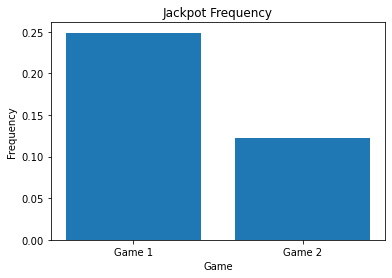

In [27]:
Game = ['Game 1', 'Game 2']
Frequency = [0.249,0.123]

plt.bar(Game,Frequency)
plt.title('Jackpot Frequency')
plt.xlabel('Game')
plt.ylabel('Frequency')
plt.show()

## A 6-sided die

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. <br> 
- One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). 
- The other unfair die (Type 2) will  weight 1 five times more than the others.

In [28]:
fd1 = Die([1,2,3,4,5,6])
dt1 = Die([1,2,3,4,5,6])
dt2 = Die([1,2,3,4,5,6])

In [29]:
dt1.change_the_weight(6,5)

In [30]:
dt1.show()

The current state faces and weights:


,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [31]:
dt2.change_the_weight(1,5)

In [32]:
dt2.show()

The current state faces and weights:


,faces,weights
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


### Play a game of 10000 rolls with 5 fair dice.

In [33]:
game3 = DieGame([fd1,fd1,fd1,fd1,fd1])

In [34]:
game3.play2(10000)

In [35]:
game3.display()

,0,1,2,3,4
Roll_Number,,,,,
1,2,4,2,4,1
2,4,6,2,5,2
3,3,4,4,5,3
4,2,2,2,4,6
5,2,5,3,5,5
...,...,...,...,...,...
9996,2,6,2,1,3
9997,6,2,4,5,2
9998,4,2,1,1,1


### Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [36]:
game4 = DieGame([dt1,dt1,dt2,fd1,fd1])

In [37]:
game4.play2(10000)

In [38]:
game4.display()

,0,1,2,3,4
Roll_Number,,,,,
1,3,6,1,5,4
2,2,3,1,5,5
3,2,6,3,3,1
4,2,6,3,2,3
5,4,1,1,5,3
...,...,...,...,...,...
9996,3,6,3,3,6
9997,6,6,1,5,5
9998,6,6,1,2,5


### For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [39]:
norwegianw = Analyzer(game3)
yesterday = Analyzer(game4)

In [40]:
norwegianw.jackpot()

1

In [41]:
norwegianw.jack

,0,1,2,3,4
Roll_Number,,,,,
4263,6,6,6,6,6


In [42]:
yesterday.jackpot()

9

In [43]:
yesterday.jack

,0,1,2,3,4
Roll_Number,,,,,
268,1,1,1,1,1
3147,6,6,6,6,6
4409,4,4,4,4,4
4537,6,6,6,6,6
6018,3,3,3,3,3
7162,2,2,2,2,2
7844,6,6,6,6,6
8985,6,6,6,6,6
9792,6,6,6,6,6


In [45]:
print('Game 3 had a relative frequency of:') 
game3freq = 1/10000
game3freq

Game 3 had a relative frequency of:


0.0001

In [44]:
print('Game 4 had a relative frequency of:') 
game4freq = 9/10000
game4freq

Game 4 had a relative frequency of:


0.0009

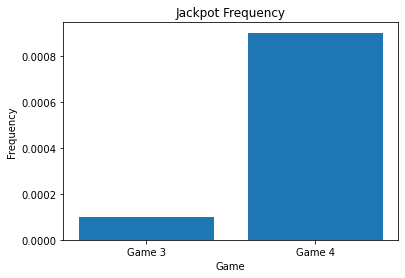

In [46]:
Game = ['Game 3', 'Game 4']
Frequency = [0.0001,0.0009]

plt.bar(Game,Frequency)
plt.title('Jackpot Frequency')
plt.xlabel('Game')
plt.ylabel('Frequency')
plt.show()

### Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

<AxesSubplot:xlabel='0,1,2,3,4'>

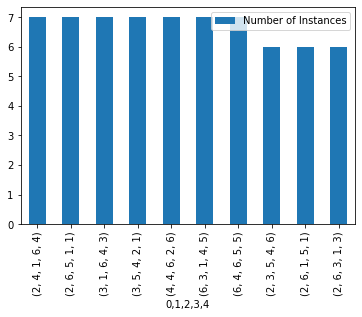

In [52]:
norwegianw.combo().nlargest(n=10,columns = ['Number of Instances']).plot.bar()

<AxesSubplot:xlabel='0,1,2,3,4'>

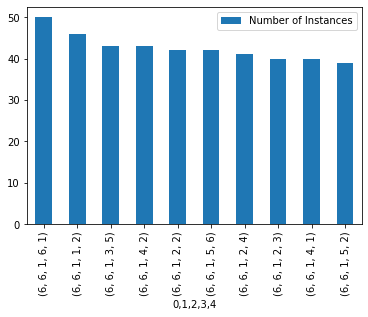

In [53]:
yesterday.combo().nlargest(n=10,columns = ['Number of Instances']).plot.bar()

## Letters of the Roman Alphabet

### Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [54]:
alpha = Die(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

In [55]:
alpha.change_the_weight('A',8.4966)

In [56]:
alpha.change_the_weight('B',2.0720)

In [57]:
alpha.change_the_weight('C',4.5388)

In [58]:
alpha.change_the_weight('D',3.3844)

In [59]:
alpha.change_the_weight('E',11.1607)

In [60]:
alpha.change_the_weight('F',1.8121)

In [61]:
alpha.change_the_weight('G',2.4705)

In [62]:
alpha.change_the_weight('H',3.0034)

In [63]:
alpha.change_the_weight('I',7.5448)

In [64]:
alpha.change_the_weight('J',0.1965)

In [65]:
alpha.change_the_weight('K',1.1016)

In [66]:
alpha.change_the_weight('L',5.4893)

In [67]:
alpha.change_the_weight('M',3.0129)

In [68]:
alpha.change_the_weight('N',6.6544)

In [69]:
alpha.change_the_weight('O',7.1635)

In [70]:
alpha.change_the_weight('P',3.1671)

In [71]:
alpha.change_the_weight('Q',0.1962)

In [72]:
alpha.change_the_weight('R',7.5809)

In [73]:
alpha.change_the_weight('S',5.7351)

In [74]:
alpha.change_the_weight('T',6.9509)

In [75]:
alpha.change_the_weight('U',3.6308)

In [76]:
alpha.change_the_weight('V',1.0074)

In [77]:
alpha.change_the_weight('W',1.2899)

In [78]:
alpha.change_the_weight('X',0.2902)

In [79]:
alpha.change_the_weight('Y',1.7779)

In [80]:
alpha.change_the_weight('Z',0.2722)

In [81]:
alpha.show()

The current state faces and weights:


,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


In [82]:
game5 = DieGame([alpha,alpha,alpha,alpha,alpha])

In [83]:
game5.play2(1000)

In [84]:
game5.display()

,0,1,2,3,4
Roll_Number,,,,,
1,E,C,C,I,S
2,A,E,K,A,S
3,V,L,A,L,S
4,E,A,V,I,O
5,I,O,O,P,Y
...,...,...,...,...,...
996,E,D,A,N,I
997,U,E,G,R,L
998,E,E,L,N,T


### How many combos can you that look like actual English words? ← NOTE: "combo" here just means resulting sequence, not literally combination as opposed to permutation.

In [85]:
hey_jude = Analyzer(game5)

In [86]:
hey_jude.combo()

Number of Instances
0 1 2 3 4                     
A A A N V                    1
    H V H                    1
    N A M                    1
    R E L                    1
      W Z                    1
...                        ...
Y S P A V                    1
  T A O N                    1
  U N R O                    1
  W E T S                    1
  Y R E H                    1

[1000 rows x 1 columns]

In [93]:
pd.set_option('display.max_rows', 100) #I did a 1000, looked through and it really didn't look like anything
hey_jude.combo()

Number of Instances
0 1 2 3 4                     
A A A N V                    1
    H V H                    1
    N A M                    1
    R E L                    1
      W Z                    1
...                        ...
Y S P A V                    1
  T A O N                    1
  U N R O                    1
  W E T S                    1
  Y R E H                    1

[1000 rows x 1 columns]

In [95]:
game6 = DieGame([alpha,alpha,alpha])

In [97]:
game6.play2(1000)

In [99]:
gently_weeps = Analyzer(game6)

In [103]:
pd.set_option('display.max_rows', 100) #More frequent with 3 letter words (and easier to see) especially if you consider government 
# agency names words
gently_weeps.combo()

Number of Instances
0 1 2                     
A A I                    2
    R                    3
    T                    1
  C E                    1
    H                    1
...                    ...
Y P E                    1
    U                    1
  S E                    1
  T O                    1
Z A E                    1

[900 rows x 1 columns]